**recsys-cluster-loss**

In [6]:
# cloning repository with database
!rm -rf recsys-cluster-loss
!git clone https://github.com/ravarmes/recsys-cluster-loss.git

Cloning into 'recsys-cluster-loss'...


In [7]:
import pandas as pd
import sys
sys.path.append('recsys-cluster-loss/src')
from ArticleAntidoteData import ArticleAntidoteData
from ArticleAntidoteData import IndividualLossVariance

In [8]:
# Importando Bibliotecas:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [9]:
# reading data from a base with 20 movies and 40 users
Data_path = 'recsys-cluster-loss/data/Movie20Items'
n_users=  40
n_movies= 20
top_users = False # True: to use users with more ratings; False: otherwise
top_movies = False # True: to use movies with more ratings; False: otherwise

In [10]:
# recommendation algorithm
#algorithm = 'RecSysALS'
algorithm = 'RecSysExampleAntidoteData20Items'

In [11]:
# parameters for calculating fairness measures
l = 5
theta = 3
k = 3

In [12]:
article = ArticleAntidoteData(n_users, n_movies, top_users, top_movies, l, theta, k)

In [13]:
X, genres, user_info = article.read_movieitems(n_users, n_movies, top_users, top_movies, data_dir = Data_path) # returns matrix of ratings with n_users rows and n_moveis columns
omega = ~X.isnull() # matrix X with True in cells with evaluations and False in cells not rated

In [14]:
user_info

,Gender,Age,NA,SPI,MA,MR
1,M,20,12,530,2.08,2.38
2,F,24,12,570,3.00,2.75
3,M,30,11,600,3.18,2.89
4,F,17,10,550,2.50,2.90
5,M,51,10,500,3.60,3.20
6,F,47,10,550,2.70,3.30
7,M,41,10,500,2.50,2.70
8,F,38,10,550,3.30,2.60
9,M,21,10,500,3.40,3.20
10,F,18,10,550,3.00,2.80


In [15]:
X_est = article.compute_X_est(X, algorithm, Data_path) # RecSysALS or RecSysKNN or RecSysNMF or RecSysExampleAntidoteData20Items

In [16]:
ilv = IndividualLossVariance(X, omega, 1)
losses = ilv.get_losses(X_est)

In [17]:
df = pd.DataFrame(columns=['Gender', 'Age', 'NA', 'SPI', 'MA', 'MR', 'Loss'])
#df = df.append(user_info['Gender'], index=['col1','col2']), ignore_index=True)
df['Loss'] = losses
df['Gender'] = user_info['Gender']
df['Age'] = user_info['Age']
df['NA'] = user_info['NA']
df['SPI'] = user_info['SPI']
df['MA'] = user_info['MA']
df['MR'] = user_info['MR']

df

,Gender,Age,NA,SPI,MA,MR,Loss
UserID,,,,,,,
1,M,20,12,530,2.08,2.38,1.000000
2,F,24,12,570,3.00,2.75,0.666667
3,M,30,11,600,3.18,2.89,4.181818
4,F,17,10,550,2.50,2.90,1.600000
5,M,51,10,500,3.60,3.20,3.900000
6,F,47,10,550,2.70,3.30,1.200000
7,M,41,10,500,2.50,2.70,1.800000
8,F,38,10,550,3.30,2.60,3.300000
9,M,21,10,500,3.40,3.20,3.400000


In [18]:
df.head()

,Gender,Age,NA,SPI,MA,MR,Loss
UserID,,,,,,,
1,M,20,12,530,2.08,2.38,1.000000
2,F,24,12,570,3.00,2.75,0.666667
3,M,30,11,600,3.18,2.89,4.181818
4,F,17,10,550,2.50,2.90,1.600000
5,M,51,10,500,3.60,3.20,3.900000


In [19]:
# Número de linhas e colunas:
df.shape

(40, 7)

In [20]:
# Estatística Descritiva:
df.describe()

,Age,NA,SPI,MA,MR,Loss
count,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000
mean,34.600000,10.125000,528.750000,3.01650,2.963000,3.801212
std,14.416515,0.463404,27.844578,0.42208,0.480231,1.823799
min,13.000000,10.000000,500.000000,2.08000,2.000000,0.666667
25%,22.000000,10.000000,500.000000,2.70000,2.600000,2.275000
50%,31.500000,10.000000,550.000000,3.00000,2.950000,3.900000
75%,43.250000,10.000000,550.000000,3.30000,3.300000,5.300000
max,69.000000,12.000000,600.000000,3.90000,4.000000,7.600000


In [21]:
# Tipos de Dados:
df.dtypes

Gender     object
Age         int64
NA          int64
SPI         int64
MA        float64
MR        float64
Loss      float64
dtype: object

In [22]:
# Verificando registros nulos:
df.isnull().sum()

Gender    0
Age       0
NA        0
SPI       0
MA        0
MR        0
Loss      0
dtype: int64

In [23]:
# Definindo um estilo para os gráficos:
plt.style.use('fivethirtyeight')

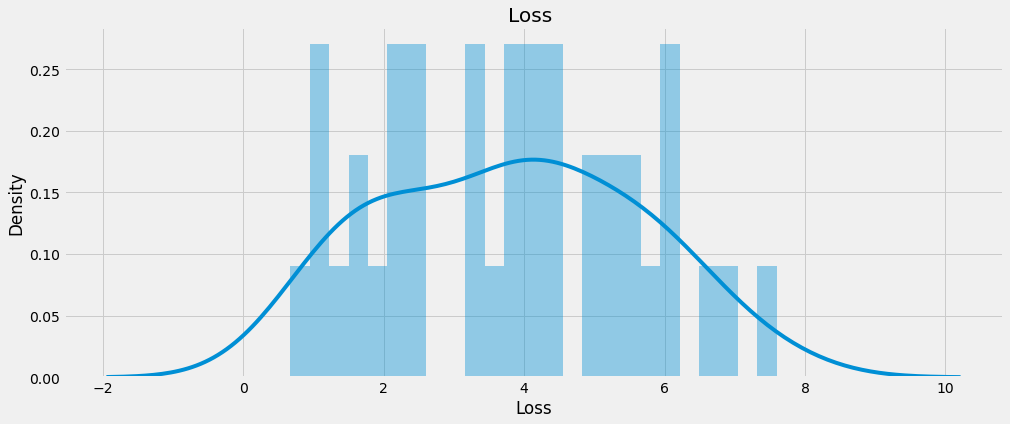

In [24]:
# Verificando as distribuição dos dados:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Loss']:
    n += 1
    plt.subplot(1 , 1 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 25)
    plt.title('{} '.format(x))
plt.show()

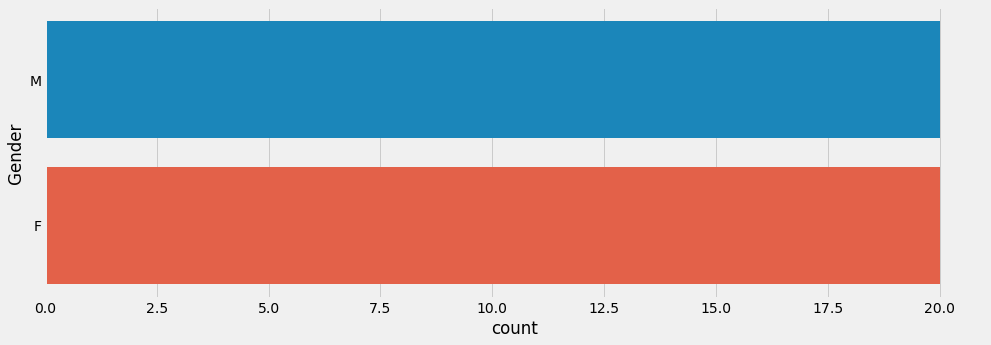

In [25]:
# Contagem de Amostras por Sexo:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

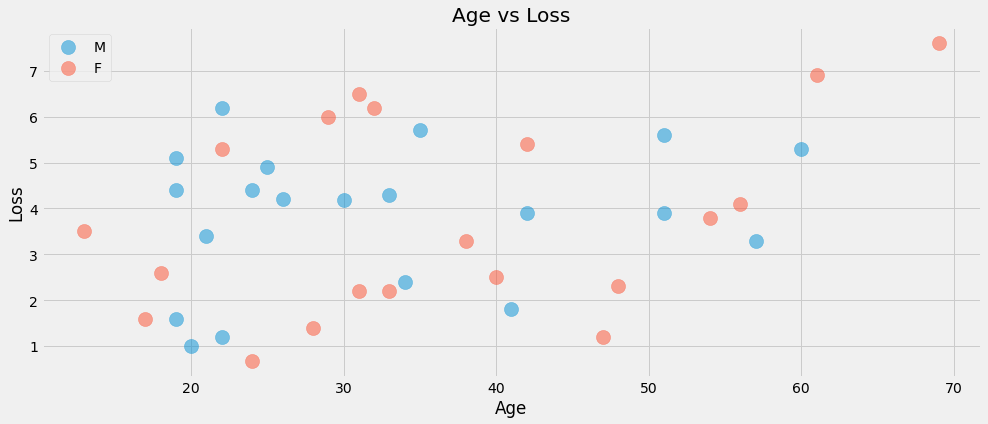

In [26]:
# Age vs Loss:
plt.figure(1 , figsize = (15 , 6))
for gender in ['M' , 'F']:
    plt.scatter(x = 'Age' , y = 'Loss' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Loss') 
plt.title('Age vs Loss')
plt.legend()
plt.show()

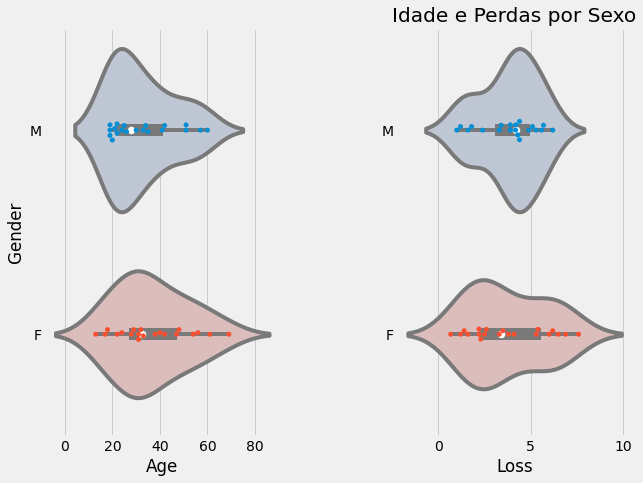

In [27]:
# Distribuição de Idade, Renda Anual e Pontuação de Gastos segmentado por Sexo:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Loss']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Idade e Perdas por Sexo' if n == 2 else '')
plt.show()

In [28]:
# Selecionando o número de clusters através do método Elbow (Soma das distâncias quadráticas intra clusters):
X2 = df[['Age' , 'Loss']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

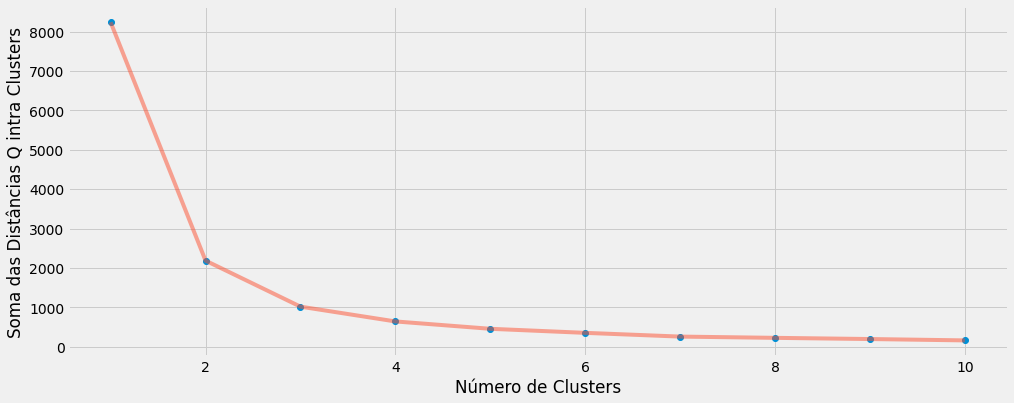

In [29]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

In [30]:
# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 4))
algorithm.fit(X2)

# Saída:

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

TypeError: __init__() got an unexpected keyword argument 'n_jobs'

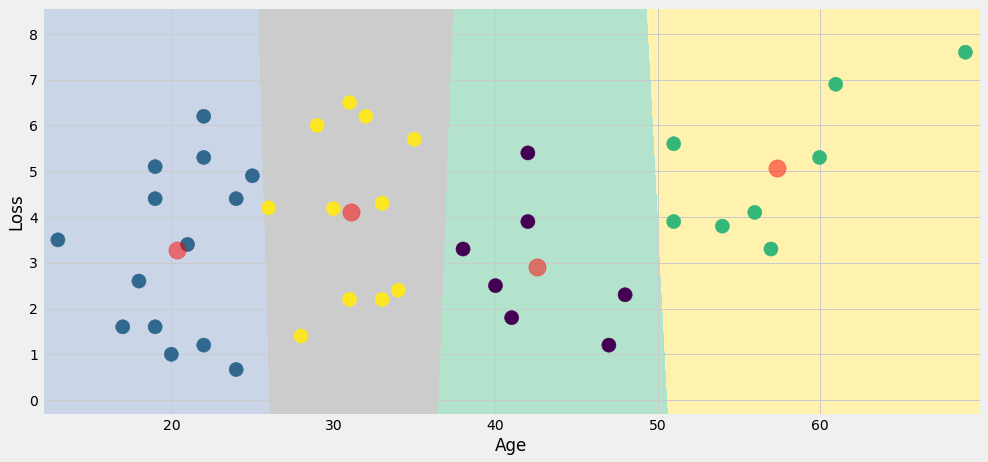

In [31]:
# Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'Age' , y = 'Loss' , data = df , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Loss') , plt.xlabel('Age')
plt.show()

In [32]:
df["clusters"] = algorithm.labels_
df.head()

,Gender,Age,NA,SPI,MA,MR,Loss,clusters
UserID,,,,,,,,
1,M,20,12,530,2.08,2.38,1.000000,1
2,F,24,12,570,3.00,2.75,0.666667,1
3,M,30,11,600,3.18,2.89,4.181818,3
4,F,17,10,550,2.50,2.90,1.600000,1
5,M,51,10,500,3.60,3.20,3.900000,2


In [33]:
# Excluindo as colunas que não foram utilizadas:
#df_group = df.drop(["UserID","Age"],axis=1).groupby("clusters")
df_group = df.groupby("clusters")

In [34]:
# Estatística descritiva dos grupos:
df_group.describe()

Age                                                         NA  \
         count       mean       std   min    25%   50%    75%   max count   
clusters                                                                    
0          7.0  42.571429  3.644957  38.0  40.50  42.0  44.50  48.0   7.0   
1         14.0  20.357143  3.201133  13.0  19.00  20.5  22.00  25.0  14.0   
2          8.0  57.375000  5.974649  51.0  53.25  56.5  60.25  69.0   8.0   
3         11.0  31.090909  2.700168  26.0  29.50  31.0  33.00  35.0  11.0   

                     ...     MR       Loss                                \
               mean  ...    75%  max count      mean       std       min   
clusters             ...                                                   
0         10.000000  ...  3.150  3.3   7.0  2.914286  1.415896  1.200000   
1         10.285714  ...  3.075  4.0  14.0  3.276190  1.830857  0.666667   
2         10.000000  ...  3.400  3.8   8.0  5.062500  1.564734  3.300000   
3         10.090909  ...  3.350  3.5  11.0  4.116529  1.838306  1.400000   

                                   
            25%   50%    75%  max  
clusters                           
0         2.050  2.50  3.600  5.4  
1         1.600  3.45  4.775  6.2  
2         3.875  4.70  5.925  7.6  
3         2.300  4.20  5.850  6.5  

[4 rows x 48 columns]